Test the modelled RH_s - no real data

Used in the numerical method (it is depended on Ts that is unknown)

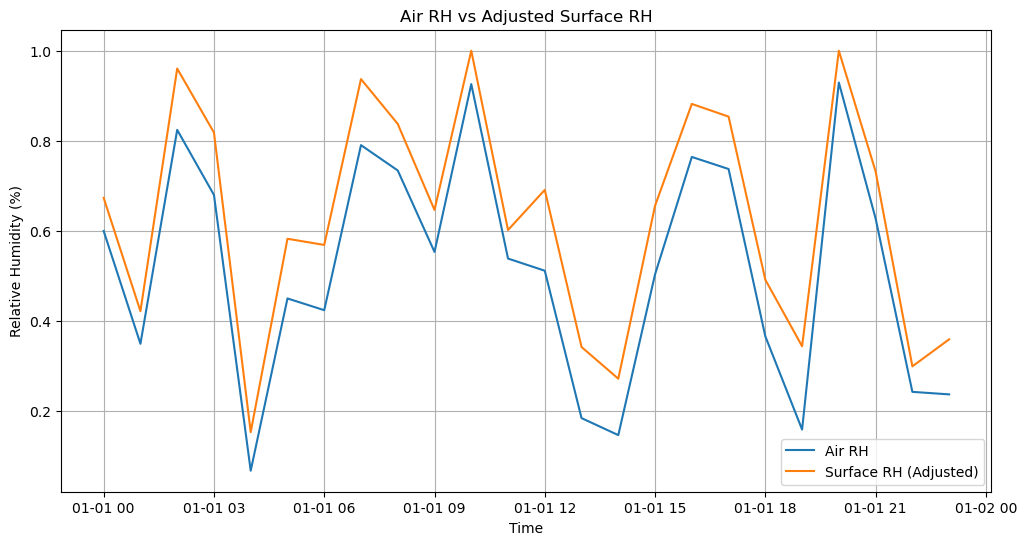

In [3]:
import numpy as np
import pandas as pd
from equations import surface_relative_humidity

# Example usage with dummy time series data
index = pd.date_range(start='2024-01-01', periods=24, freq='h')
data = {
    'RH_air': np.random.uniform(.0, 1, 24),
    'Ts': np.random.uniform(10, 25, 24),
    'Ta': np.random.uniform(12, 28, 24),
    'prec': np.random.uniform(0, 5, 24),
    'snow_cover': np.full_like(np.random.uniform(0, 1, 24),1),
    'u': np.random.uniform(0, 8, 24)
}
df = pd.DataFrame(data, index=index)

# Apply the function to the time series data
df['RH_surface'] = surface_relative_humidity(
    df['RH_air'], df['Ts'], df['Ta'],
    df['prec'], df['snow_cover'], df['u']
)

# Optional: Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RH_air'], label='Air RH')
plt.plot(df.index, df['RH_surface'], label='Surface RH (Adjusted)')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Air RH vs Adjusted Surface RH')
plt.legend()
plt.grid(True)
plt.show()